## Bulanıklaştırma

Görüntüye düşük geçişli bir filtre uygulanmasıyla elde edilir.

Gürültüyü gidermek için kullanışlıdır.Aslında görüntüden yüksek frekanslı içeriği (parazit, kenarlar) kaldırır.

OpenCV de üç ana tür bulanıklaştırma tekniği vardır

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5))

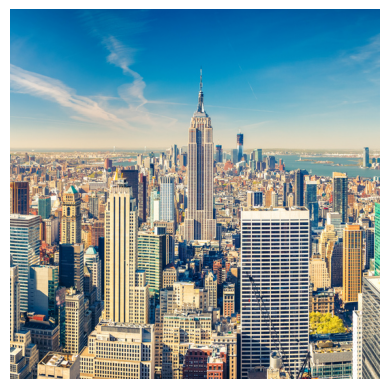

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings 

#gereksiz uyarıları ignore et 
warnings.filterwarnings("ignore") 

#içe aktar
img = cv2.imread("NYC.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure("orjinal"),plt.imshow(img), plt.axis("off"),

### 1 - Ortalama Bulanıklaştırma 
- Bir görüntünün normalleştirilmiş bir kutu filtresiyle sarılmasıyla yapılır.
- Çekirdek alanı altındaki tüm piksellerin ortalamasını alır ve bu ortalamayı merkez öğe ile yer değiştirir.
- 5x5 lik bi kutucuk fotoğrafın üzerinde gezip üzerinden geçtiği piksellerin ortalama değerleri alarak bulanıklaştırma yapıyor.Eğer üzerinden geçtiği alanda bir gürültü varsa diğer pikseller gürültüye daha baskın geldiğinden gürültü ortadan kaldırılmış oluyor

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'ortalama'),
 (-0.5, 542.5, 542.5, -0.5))

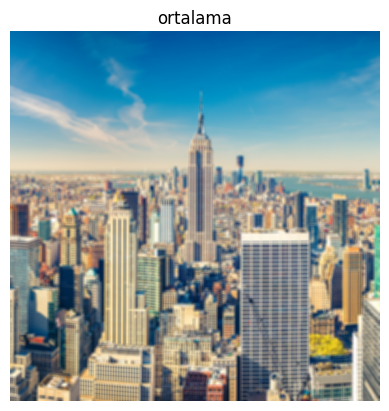

In [18]:
#opencv de girdiler source çıktılar dst 
dst2 = cv2.blur(img, ksize = (5,5)) #ksize kutucuğun boyutu 
plt.figure() ,plt.title("ortalama"), plt.imshow(dst2), plt.axis("off")


## 2 - Gaussian Blur 
- Bu yöntemde kutu filtresi yerine Gauss çekirdeği kullanılır.
- Pozitif ve tek olması gereken çekirdeğin genişliği ve yüksekliğini belirtir.2 boyutlu bi gauss olarak düşünülebilir.Ortalama değerleri almak yerine çekirdek içinde daha önce belirlediğimiz değerlere göre işlemler gerçekleştiriliyor.
- SigmaX ve sigmaY , X ve Y yönlerindeki standart sapmayı belirtmeliyiz.

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Gaussian Blur'))

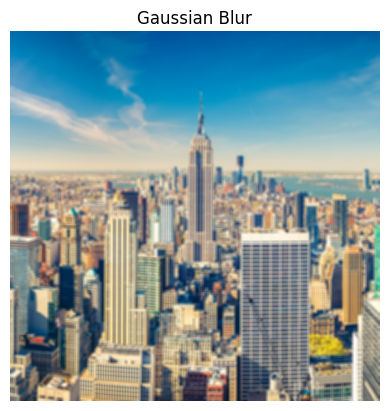

In [19]:
#sigmaY yazılmazsaa otomatik olalrak sigmaX e eşit sayılıyor 

gb = cv2.GaussianBlur(img, ksize = (5,5), sigmaX = 7)
plt.figure(), plt.imshow(gb), plt.axis("off"),plt.title("Gaussian Blur")

## 3 Median Blur
- Çekirdek alanı altındaki tüm piksellerin medyanını alır ve merkezi öğe bu medyan değerle değiştirilir.Kutucuk piksellerin üzerinde dolaşıp ortadaki sayıyı alıyor
- Tuz ve Biber gürültüsüne karşı oldukça etkilidir.

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Medyan Blur'))

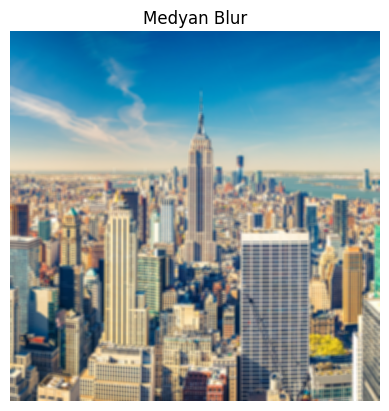

In [20]:
mb = cv2.medianBlur(img, ksize = 3)
plt.figure("Median Blur"), plt.imshow(gb), plt.axis("off"),plt.title("Medyan Blur")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'orjinalin normalize edilmişi'))

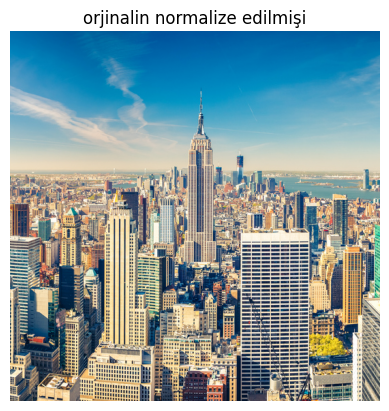

In [22]:
# içe aktar ve normalize et 0-255 arası değişen değerleri 0-1 arasına taşı 

img = cv2.imread("NYC.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255
plt.figure(),plt.imshow(img), plt.axis("off"),plt.title("orjinalin normalize edilmişi")

In [39]:
#gauss gürültüsü ekleyip daha sonra gürültüyü gauss bulanıklaştırma ile azaltacağız 
def gaussianNoise(image):
    row, col, ch = image.shape
    mean = 0 #gaus noise oluştururken ortalama değer ve standart sapmaya ihtiyacımız var 
    var = 0.02 #varyansı da standart sapmayı elde etmek için kullanıyoruz 
    sigma = var**0.5  #standart sapmamız yani sigmamız varyansın kareköküdür.
    #gaussianın diğer ismi normal dağılımdır
    gauss = np.random.normal(mean, sigma, (row,col,ch))
    gauss =gauss.reshape(row,col,ch)
    noisy = image + gauss
    return noisy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<Figure size 640x480 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Gauss Noisy'))

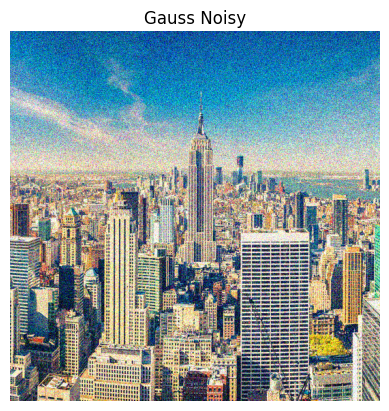

In [40]:
gaussianNoisyImage = gaussianNoise(img)    
plt.figure(),plt.imshow(gaussianNoisyImage), plt.axis("off"),plt.title("Gauss Noisy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<Figure size 640x480 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Gaussian Blur on Gaussian Noisy'))

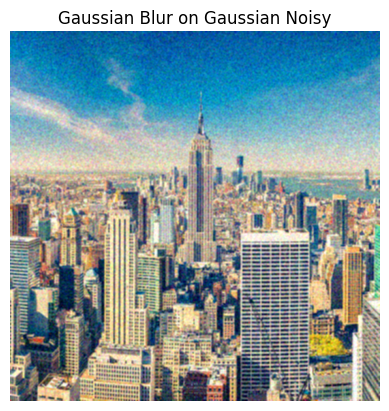

In [41]:
#gaus blur
gb2 = cv2.GaussianBlur(gaussianNoisyImage, ksize = (3,3), sigmaX =10)
plt.figure(), plt.imshow(gb2), plt.axis("off"),plt.title("Gaussian Blur on Gaussian Noisy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Gaussian Blur on Gaussian Noisy')

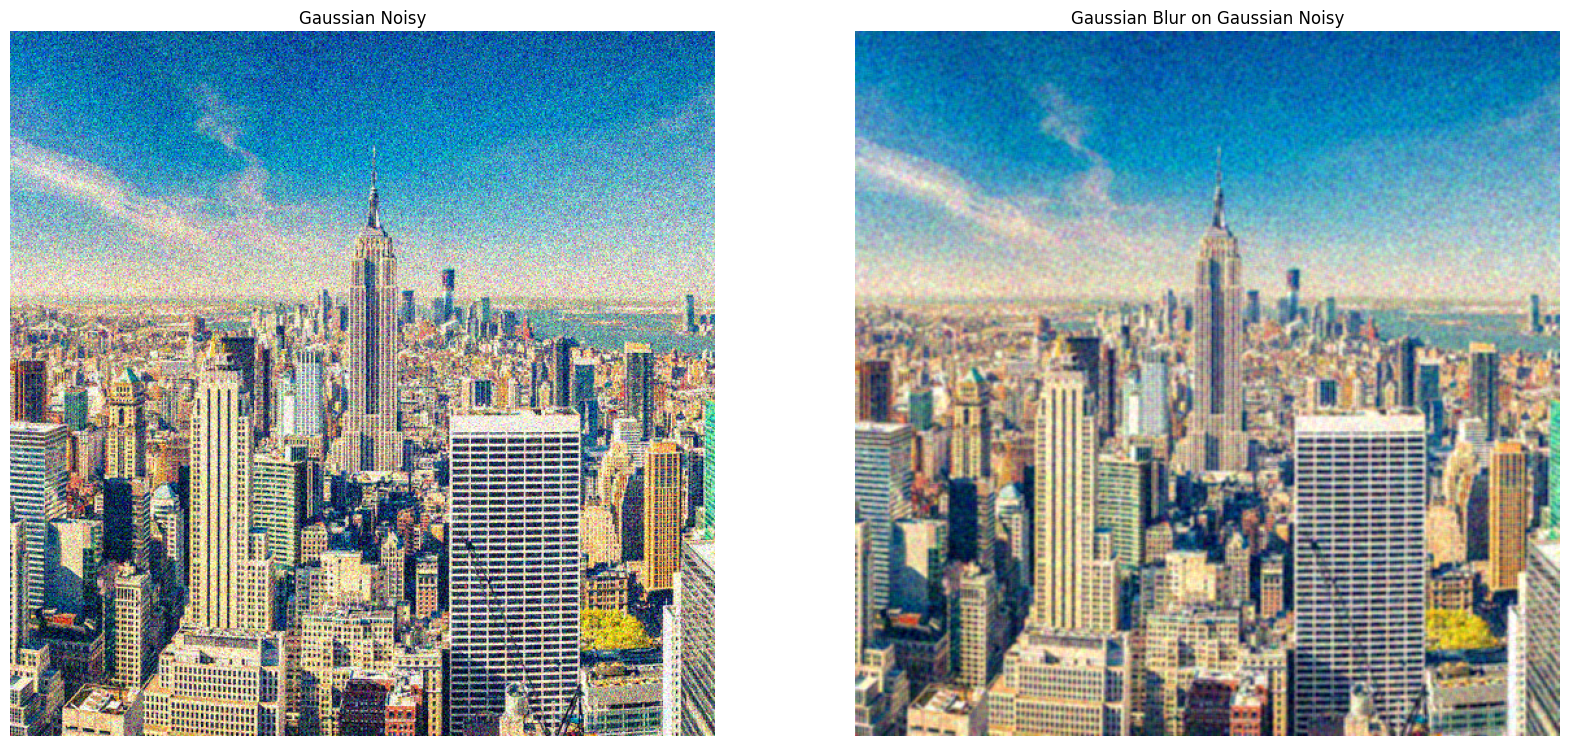

In [54]:
fig = plt.figure(figsize=(20,10))
first_plot = fig.add_subplot(1,2,1)
first_plot.imshow(gaussianNoisyImage)
first_plot.axis("off")
first_plot.set_title("Gaussian Noisy")

second_plot = fig.add_subplot(1,2,2)
second_plot.imshow(gb2)
second_plot.axis("off")
second_plot.set_title("Gaussian Blur on Gaussian Noisy")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Salt Pepper Image'))

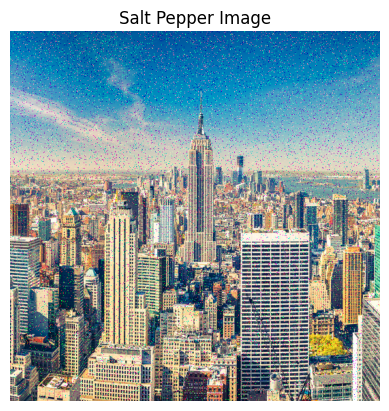

In [46]:
# median  blur test etmek için salt and pepper gürültüsü ekleyelim
def saltPepperNoise(image):
    row, col, ch = image.shape
    s_vs_p = 0.5
    
    amount = 0.04
    
    noisy = np.copy(image)
    
    #salt beyaz noktalar 
    num_salt = np.ceil(amount * image.size * s_vs_p)
    #ceil elimizdeki herhangi bir ondalıklı sayıyı yukarı ya da aşağı yuvarlar 
    coords = [np.random.randint(0, i-1, int(num_salt) )for i in image.shape]
    noisy[coords] = 1
    
    #pepper siyah
    num_pepper = np.ceil(amount * image.size * (1-s_vs_p))
    #ceil elimizdeki herhangi bir ondalıklı sayıyı yukarı ya da aşağı yuvarlar 
    coords = [np.random.randint(0, i-1, int(num_pepper)) for i in image.shape]
    noisy[coords] = 0
    
    return noisy

spImage = saltPepperNoise(img)
plt.figure(), plt.imshow(spImage), plt.axis("off"),plt.title("Salt Pepper Image")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Medyan Blur on Salt Pepper Noisy'))

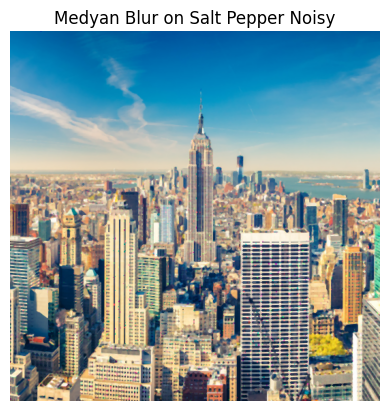

In [47]:
#medyan blurla sp noisy düzeltme    
mb2 = cv2.medianBlur(spImage.astype(np.float32), ksize = 3) #opencv floatla çalıştığı için astype dönüşümü yaptık
plt.figure(), plt.imshow(mb2), plt.axis("off"),plt.title("Medyan Blur on Salt Pepper Noisy")

Text(0.5, 1.0, 'Median Blur on Salt Pepper Noisy')

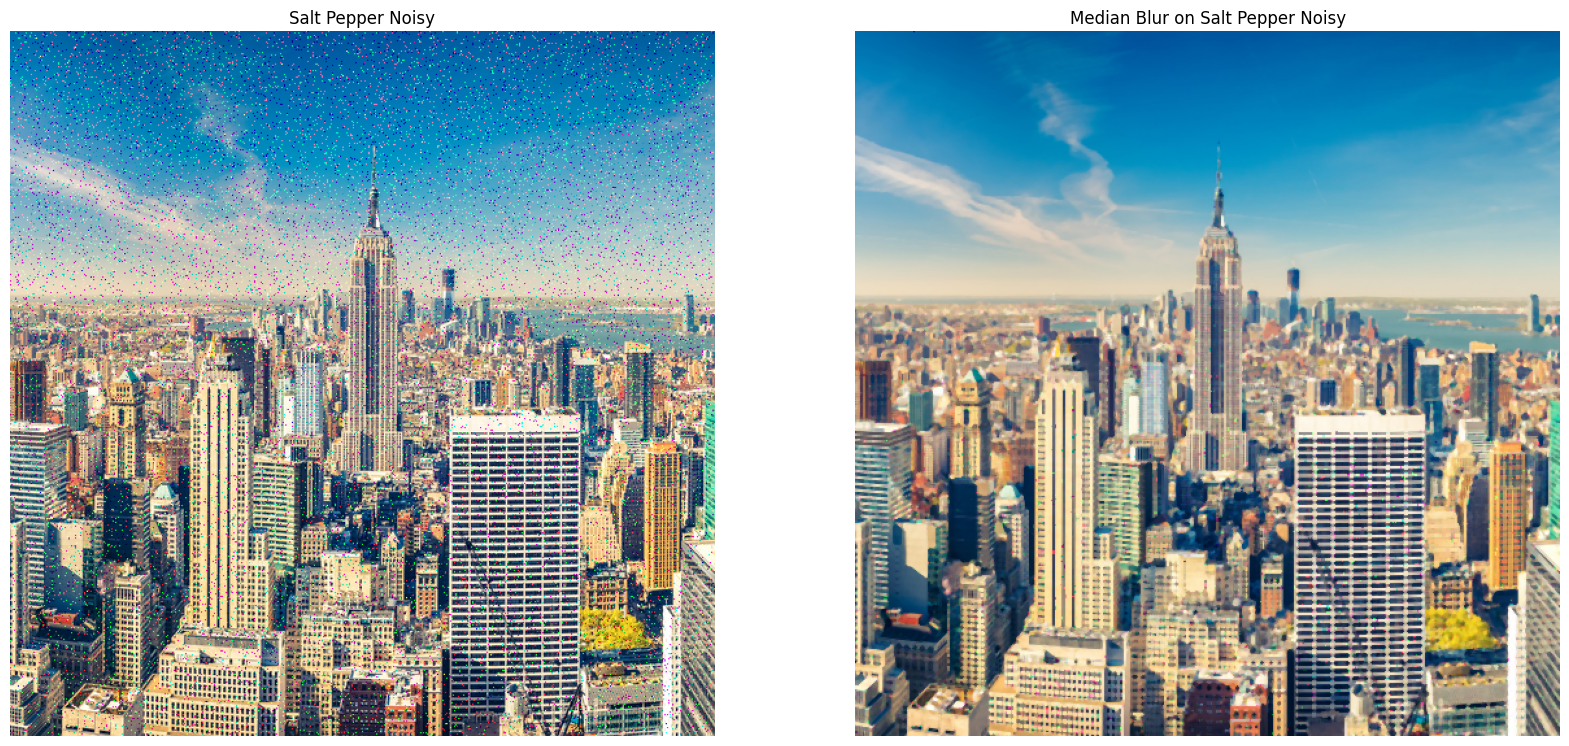

In [53]:
fig = plt.figure(figsize=(20,10))
third_plot = fig.add_subplot(1,2,1)
third_plot.imshow(spImage)
third_plot.axis("off")
third_plot.set_title("Salt Pepper Noisy")

fourth_plot = fig.add_subplot(1,2,2)
fourth_plot.imshow(mb2)
fourth_plot.axis("off")
fourth_plot.set_title("Median Blur on Salt Pepper Noisy")